## Lake Zug Mooring Deployment (5.2.2026)

In [13]:
# imports
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Lake Zug bathymetry
bathy = xr.open_dataset('Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/bathymetry.nc')

In [100]:
mooring_locs = pd.DataFrame({
    'name': ['LZC', 'LZN', 'LZW', 'LZE', 'LZW_plan', 'LZE_plan'],
    'xsc': [680091, 679423, 679912, 680314, 679850, 680330],
    'ysc': [218814, 219370, 218760, 218883, 218750, 218875],
    'echosound_depth': [177, 136, 132, 138, np.nan, np.nan]
})

mooring_locs['xsc'] += int(2e6)
mooring_locs['ysc'] += int(1e6)

mooring_locs['bathy_depth'] = [bathy.sel(xsc=row.xsc, ysc=row.ysc).depth.item() for _, row in mooring_locs.iterrows()]

mooring_locs

,name,xsc,ysc,echosound_depth,bathy_depth
0,LZC,2680091,1218814,177.0,177.53000
1,LZN,2679423,1219370,136.0,139.25000
2,LZW,2679912,1218760,132.0,145.17999
3,LZE,2680314,1218883,138.0,143.06000
4,LZW_plan,2679850,1218750,NaN,121.60001
5,LZE_plan,2680330,1218875,NaN,114.80002


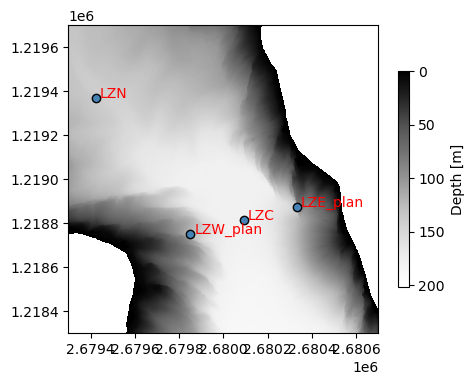

In [101]:
fig, ax = plt.subplots(figsize=(5, 4))   # figsize=(5, 8)

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

for _, row in mooring_locs.iterrows():
    if row['name'] in ['LZC', 'LZN', 'LZW_plan', 'LZE_plan']:
        ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
        ax.annotate(row['name'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

ax.set_xlim(2679300, 2680700)
ax.set_ylim(1218300, 1219700)

plt.show()